# Chapter 6. 일반선형모델

## 6.1 여러 가지 확률분포

- 일반선형모델의 장점을 활용하기 위해 확률 분포를 배워야 할 필요 있음

- 가볍게 읽어나가면서 실습 단계를 **"적당히"** 읽어두는 방식으로 학습하면 됨


### 6.1.1 용어 설명

- **이항확률변수**: 2개의 값만 가지는 확률 변수 (ex: 있다&없다, 앞&뒤)

- **베르누이 시행**: 2종류의 결좌 중 하나만 발생시키는 시행 (ex: 동전 던져서 기록)

- **성공확률**: 2종류의 결과 중 어느 한쪽의 결과를 얻을 확률 (범위 : [0,1])

- **베르누이 분포**: 한 번의 베르누이 시행이 일어날 때 이항확률변수가 따르는 확률분포


### 6.1.2 이항분포

- **이항분포**: 성공확률이 *p*면서 *N*회의 독립 베르누이 시행을 했을 때 성공한 횟수 *m*이 따르는 이산형 확률분포

- 파라미터는 성공확률 *p*와 시행횟수 *N*

- 확률변수 *m*의 기댓값은 *Np*, 분산은 *Np(1-p)*


### 6.1.3 이항분포 사용법

- 성공확률 *p*가 어떻게 변화하는가라는 시점으로 이항분포가 이용되는 경우가 많음


### 6.1.4 이항분포의 확률질량함수

- *p*: 성공확률, *N*: 시행횟수, *m*: 성공횟수



### 6.1.5 분석 준비

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%precision 3
%matplotlib inline

### 6.1.6 이항분포(실습)

- 앞이 나올 확률이 0.5인 동전을 2번 던져서 그중 1번 앞면일 확률을 계산

In [2]:
sp.stats.binom.pmf(k = 1, n = 2, p = 0.5)

0.5

- 앞이 나올 확률이 0.2인 동전을 10번 던져서 앞이 나온 수를 세는 시행 5번 반복

In [3]:
np.random.seed(1)
sp.stats.binom.rvs(n = 10, p = 0.2, size = 5)

array([2, 3, 0, 1, 1])

- 난수의 히스토그램과 이항분포의 확률질량함수에서 계산된 확률을 겹쳐서 그래프로 그리기

C:\Users\bok_suh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


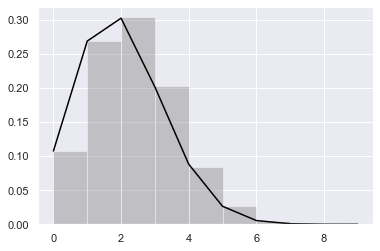

In [4]:
binomial = sp.stats.binom(n = 10, p = 0.2)
np.random.seed(1)
rvs_binomial = binomial.rvs(size = 10000)
m = np.arange(0, 10, 1)
pmf_binomial = binomial.pmf(k = m)
sns.distplot(rvs_binomial, bins = m, kde = False, norm_hist = True, color = 'gray')
plt.plot(m, pmf_binomial, color = 'black')

### 6.1.7 푸이송 분포

- **푸이송 분포**: 1개 또는 2개, 1회 또는 2회 등의 **카운트 데이터**가 따르는 이산형 확률분포

- 카운트 데이터는 "0" 이상의 정수

- 파라미터는 *λ*


### 6.1.8 푸아송 분포의 사용

- 낚싯대를 바꾸면 잡아 올리는 물고기 수가 달라지는지?

- 주변 환경에 따라 조사 구획내의 생물의 개체수가 변하는지?

- 등등을 알아볼 때 사용


### 6.1.9 푸아송 분포의 확률질량함수

- *x*: 카운트 데이터, *λ*: 푸아송 분포의 강도

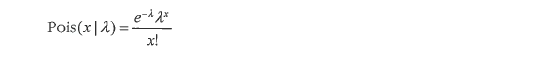


### 6.1.10 이항분포와 푸아송 분포의 관계

- 푸아송 분포는 이항분포에서 도출 가능 (도출 식은 문헌 참고)

- 푸아송 분포는 *p* --> 0, *N* --> ∞ 라는 조건에서 이항분포가 *Np = λ*인 결과


### 6.1.11 푸아송 분포(실습)

In [5]:
sp.stats.poisson.pmf(k = 2, mu = 5)

0.08422433748856832

In [6]:
np.random.seed(1)
sp.stats.poisson.rvs(mu = 2, size = 5)

array([2, 1, 0, 1, 2])

C:\Users\bok_suh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


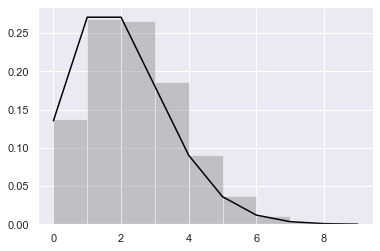

In [7]:
poisson = sp.stats.poisson(mu = 2)
np.random.seed(1)
rvs_poisson = poisson.rvs(size = 10000)
pmf_poisson = poisson.pmf(k = m)
sns.distplot(rvs_poisson, bins = m, kde = False, norm_hist = True, color = 'gray')
plt.plot(m, pmf_poisson, color = 'black')

- 푸아송 분포와 이항분포의 관계 확인하기

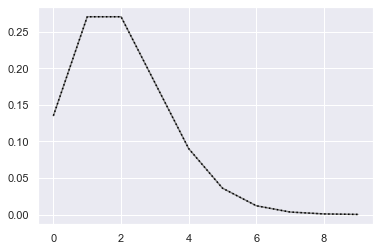

In [9]:
N = 100000000
p = 0.00000002
binomial_2 = sp.stats.binom(n = N, p = p)
pmf_binomial_2 = binomial_2.pmf(k = m)
plt.plot(m, pmf_poisson, color = 'gray')
plt.plot(m, pmf_binomial_2, color = 'black', linestyle = 'dotted')

### 6.1.12 그 외의 확률분포

- **음이항분포**: 푸아송 분포와 마찬가지로 카운트 데이터가 따르는 확률분포, 푸아송 분포보다 분산이 큼

- **감마분포**: 0 이상의 값을 취하는 연속형 확률변수가 따르는 확률분포


### 6.1.13 지수형 분포

- 모델의 추정이나 해석이 용이함


## 6.2 일반선형모델의 기본

- 일반선형모델을 이용하면 분류 문제와 회귀 문제를 통일성 있게 취급할 수 있음


### 6.2.1 일반선형모델의 구성요소

1. 모집단이 따르는 확률분포
2. 선형예측자
3. 링크함수


### 6.2.2 확률분포
- 일반선형모델은 정규분포나 이항분포, 푸아송 분포 등에 적용가능


### 6.2.3 선형예측자
- 독립변수를 선형의 관계식으로 표현한 것


### 6.2.4 링크함수
- 종속변수와 선형예측자를 서로 대응시키기 위해 사용


### 6.2.5 링크함수와 확률분포의 대응
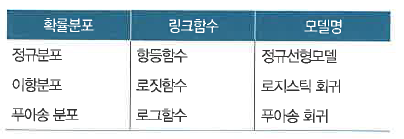
- **항등함수**: *f(x) = x*가 되는 함수


### 6.2.6 일반선형모델의 파라미터 추정
- 최대우도법에 의한 파라미터 추정
- 파라미터 추정을 위한 알고리즘으로 반복적인 최소제곱법이 이용


### 6.2.7 일반선형모델을 이용한 검정 방법
- **Wald 검정**: 샘플사이즈가 클 때 추정값이 정규분포를 따르는 것을 이용한 검정 방법
- **우도비 검정**: 모델의 적합도를 비교하는 방법


## 6.3 로지스틱 회귀
- 확률분포에 이항분포를 사용하고, 링크함수에 로짓함수를 사용한 일반선형모델
- 독립변수는 여러개 있어도 상관없고, 연속형과 카테고리형이 섞여 있어도 상관없음


### 6.3.1 이 절의 예제
- 시험에 합격, 불합격하는 것을 예측한다 생각
- 선형예측자는?



### 6.3.2 두 값 판별 문제
- 시험 합격률을 공부시간으로 설명하는 수리모델 생각해보자
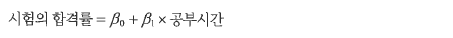
- 문제: 합격률이 마이너스값이나 1을 넘는 값이 될 가능성 존재 --> 링크함수로 로짓함수를 적용하면 해결


### 6.3.3 로짓함수
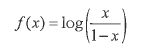


### 6.3.4 역함수
- *f(a) = b*에서 *g(b) = a*가 되는 함수 *g(x)*를 *f(x)*의 역함수라고 함


### 6.3.5 로지스틱함수
- 로짓함수의 역함수
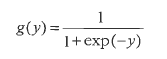


### 6.3.6 로지스틱함수의 특징
- 0 미만이거나 1을 초과하지 않음


### 6.3.7 로지스틱 회귀의 구조
- 확률분포에 이항분포를 사용하고 링크함수에 로짓함수를 사용한 일반선형모델
- 이런 느낌
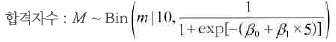


### 6.3.8 로지스틱 회귀의 우도함수
- 스샷으로 대체
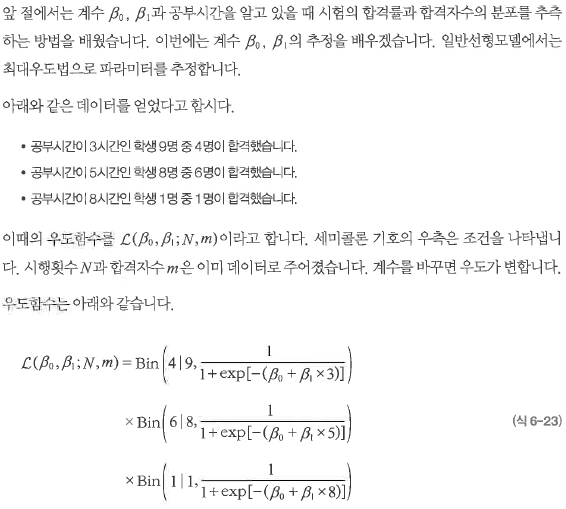


### 6.3.9 분석 준비

In [11]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
%precision 3
%matplotlib inline

### 6.3.10 데이터 읽어 들이기와 그래프 표시
- hours : 공부시간, result : 시험의 합격여부 (합격 = 1)

In [14]:
test_result = pd.read_csv("6-3-1-logistic-regression.csv")
print(test_result.head(3))

   hours  result
0      0       0
1      0       0
2      0       0


<AxesSubplot:xlabel='hours', ylabel='result'>

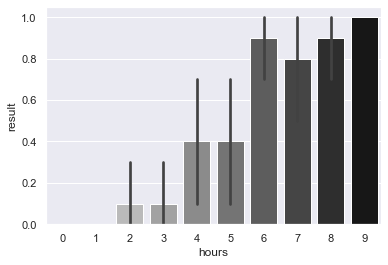

In [15]:
sns.barplot(x = "hours", y = "result", data = test_result, palette = 'gray_r')

In [16]:
print(test_result.groupby("hours").mean())

       result
hours        
0         0.0
1         0.0
2         0.1
3         0.1
4         0.4
5         0.4
6         0.9
7         0.8
8         0.9
9         1.0


- 1시간 이하로 한 사람은 아무도 합격하지 못했고 9시간 공부한 사람은 전부 합격한 것을 확인


### 6.3.11 로지스틱 회귀(실습)

In [17]:
mod_glm = smf.glm(formula = "result ~ hours", data = test_result, family = sm.families.Binomial()).fit()

### 6.3.12 로지스틱 회귀 결과의 출력

In [18]:
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Fri, 12 Feb 2021   Deviance:                       68.028
Time:                        15:35:13   Pearson chi2:                     84.9
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

- IRLS (Iterative Reweighted Least Squares) : 최소제곱법


### 6.3.13 모델 선택
- 우선 Null 모델 추정

In [19]:
mod_glm_null = smf.glm("result ~ 1", data = test_result, family = sm.families.Binomial()).fit()

- AIC를 비교

In [20]:
print("Null 모델        : ", mod_glm_null.aic.round(3))
print("변수가 있는 모델 : ", mod_glm.aic.round(3))

Null 모델        :  139.989
변수가 있는 모델 :  72.028


- 공부시간을 독립변수로 이용한 모델의 AIC가 더 작음
- 공부시간을 늘리면 합격률이 오른다고 판단해도 괜찮을 것 같다!


### 6.3.14 로지스틱 회귀곡선 그래프
- 가로축: 공부시간, 세로축: 합격 여부의 이항확률변수를 지정한 산포도, 이론상의 합격률을 겹쳐보겠습니다.

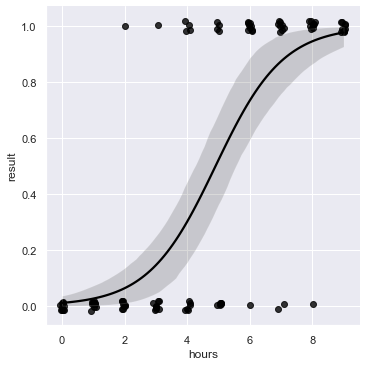

In [23]:
sns.lmplot(x = "hours", y = "result", 
           data = test_result,
           logistic = True, 
           scatter_kws = {"color": "black"}, 
           line_kws = {"color": "black"}, 
           x_jitter = 0.1, y_jitter = 0.02)

### 6.3.15 성공확률 예측

In [24]:
exp_val = pd.DataFrame({
    "hours": np.arange(0, 10, 1)
})
pred = mod_glm.predict(exp_val)
pred

0    0.010367
1    0.025836
2    0.062920
3    0.145291
4    0.300876
5    0.521427
6    0.733929
7    0.874741
8    0.946467
9    0.978147
dtype: float64

### 6.3.16 용어 설명
- **오즈**: 실패하는 것보다 성공하는 것이 몇 배 더 쉬운가를 나타냄 ( p / (1-p) )
- **오즈비**: 오즈 간에 비율을 취한 것
- **로그오즈비**: 오즈비에 로그를 취한 것


### 6.3.17 로지스틱 회귀계수와 오즈비의 관계

In [25]:
exp_val_1 = pd.DataFrame({"hours": [1]})
pred_1 = mod_glm.predict(exp_val_1)
exp_val_2 = pd.DataFrame({"hours": [2]})
pred_2 = mod_glm.predict(exp_val_2)

In [26]:
odds_1 = pred_1 / (1 - pred_1)
odds_2 = pred_2 / (1 - pred_2)
sp.log(odds_2 / odds_1)

<ipython-input-26-601289041921>:3: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  sp.log(odds_2 / odds_1)


array([0.929])

In [27]:
mod_glm.params["hours"]

0.9288901756284957

In [28]:
sp.exp(mod_glm.params["hours"])

<ipython-input-28-b5475642cd5c>:1: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  sp.exp(mod_glm.params["hours"])


2.531697877875777

## 6.4 일반선형모델의 평가
- 잔차의 체크는 필수!
- 잔차: 데이터와 모델의 괴리를 표현하는 중요한 지표
- 모델의 손실을 파악하는 방법도 배워 보겠움


### 6.4.1 분석 준비

In [29]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
%precision 3
%matplotlib inline

In [30]:
test_result = pd.read_csv("6-3-1-logistic-regression.csv")
mod_glm = smf.glm("result ~ hours", data = test_result,
                 family = sm.families.Binomial()).fit()

### 6.4.2 피어슨 잔차
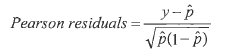
- 위와 같이 계산됨


### 6.4.3 피어슨 잔차의 해석
- 피어슨 잔차의 제곱합은 **피어슨 카이제곱통계량**으로 부르고 모델 적합도의 지표임


### 6.4.4 피어슨 잔차(실습)

In [33]:
pred = mod_glm.predict()
y = test_result.result
peason_resid = (y - pred) / sp.sqrt(pred * (1 - pred))
peason_resid.head(3)

<ipython-input-33-23b79bfeef57>:3: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  peason_resid = (y - pred) / sp.sqrt(pred * (1 - pred))


0   -0.102351
1   -0.102351
2   -0.102351
Name: result, dtype: float64

In [34]:
mod_glm.resid_pearson.head(3)

0   -0.102351
1   -0.102351
2   -0.102351
dtype: float64

In [35]:
sp.sum(mod_glm.resid_pearson**2)

<ipython-input-35-6b4eff90a61f>:1: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  sp.sum(mod_glm.resid_pearson**2)


84.91138782569993

In [36]:
mod_glm.pearson_chi2

84.91138782569993

### 6.4.5 Deviance(디비언스)
- 모델의 적합도를 평가하는 지표 (크면 모델이 맞지 않는다고 평가)
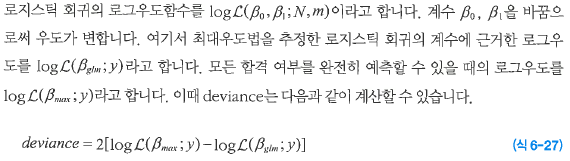


### 6.4.6 deviance의 해석
- deviance는 잔차제곱합을 우도처럼 표현한 것 (최대우도법의 결과와 deviance라는 손실을 최소화하도록 파라미터를 추정한 결과는 일치)


### 6.4.7 deviance와 우도비 검정
- 2를 곱한 이유는 우도비 검정을 할 때 편하기 때문
- deviance는 일반선형모델에서 잔차제곱합과 같은 의미를 갖는 지표 --> deviance의 차이를 통계량으로 한 검정은 분산분석처럼 해석 가능
- deviance의 차이를 검정하는 것 : 우도비 검정


### 6.4.8 deviance 잔차
- 이항분포에서 deviance 잔차제곱합이 deviance가 된다는 사실!로 계산

In [37]:
pred = mod_glm.predict()
y = test_result.result
resid_tmp = 0 - sp.log(
    sp.stats.binom.pmf(k = y, n = 1, p = pred))
deviance_resid = sp.sqrt(2 * resid_tmp) * np.sign(y - pred)
deviance_resid.head(3)

<ipython-input-37-e9440746db5e>:3: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  resid_tmp = 0 - sp.log(
<ipython-input-37-e9440746db5e>:5: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  deviance_resid = sp.sqrt(2 * resid_tmp) * np.sign(y - pred)


0   -0.144369
1   -0.144369
2   -0.144369
Name: result, dtype: float64

In [38]:
mod_glm.resid_deviance.head(3)

0   -0.144369
1   -0.144369
2   -0.144369
dtype: float64

In [39]:
sp.sum(mod_glm.resid_deviance ** 2)

<ipython-input-39-003dcde03abc>:1: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  sp.sum(mod_glm.resid_deviance ** 2)


68.0278811811727

### 6.4.9 교차 엔트로피 오차
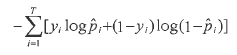
- 모집단분포가 이항분포라고 가정한 경우 deviance와 같은 의미


## 6.5 푸아송 회귀
- 확률분포에 푸아송 분포를 사용하고, 링크함수에 로그함수를 사용한 일반선형모델


### 6.5.1 이 절의 예제
- 맥주 판매 계수를 예측
- 선형예측자는 아래와 같음
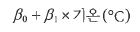


### 6.5.2 푸아송 회귀의 구조
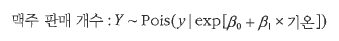
- 푸아송 분포의 확률질량함수는 아래와 같음
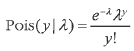


### 6.5.3 분석 준비

In [41]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
%precision 3
%matplotlib inline

In [42]:
beer = pd.read_csv("6-5-1-poisson-regression.csv")
print(beer.head(3))

   beer_number  temperature
0            6         17.5
1           11         26.6
2            2          5.0


### 6.5.4 푸아송 회귀(실습)

In [43]:
mod_pois = smf.glm("beer_number ~ temperature", beer,
                  family = sm.families.Poisson()).fit()
mod_pois.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            beer_number   No. Observations:                   30
Model:                            GLM   Df Residuals:                       28
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -57.672
Date:                Fri, 12 Feb 2021   Deviance:                       5.1373
Time:                        16:11:09   Pearson chi2:                     5.40
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4476      0.199      2.253      0.024       0.058       0.837
temperature     0.0761      0.008      9.784      0.000       0.061       0.091
===============================================================================
"""

- 기온의 계수가 양의 값 : 기온이 오르면 판매 개수도 늘어날 것만 같음


### 6.5.5 모델 선택
- Null 모델 추정

In [44]:
mod_pois_null = smf.glm(
    "beer_number ~ 1", data = beer,
    family=sm.families.Poisson()).fit()

In [45]:
print("Null 모델        : ", mod_pois_null.aic.round(3))
print("변수가 있는 모델 : ", mod_pois.aic.round(3))

Null 모델        :  223.363
변수가 있는 모델 :  119.343


### 6.5.6 회귀곡선 그래프

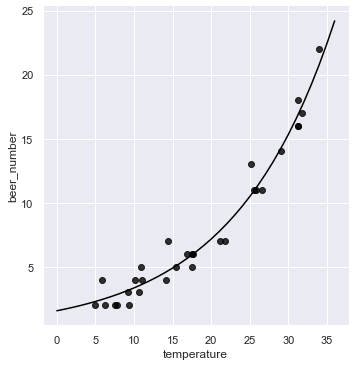

In [46]:
x_plot = np.arange(0, 37)
pred = mod_pois.predict(pd.DataFrame({"temperature" : x_plot}))
sns.lmplot(y = "beer_number", x = "temperature",
          data = beer, fit_reg = False,
          scatter_kws = {"color":"black"})
plt.plot(x_plot, pred, color = "black")

### 6.5.7 회귀계수 해석
- 기온이 1도 오르면 맥주 판매 개수가 몇 배 되는지 확인해보자

In [47]:
exp_val_1 = pd.DataFrame({"temperature": [1]})
pred_1 = mod_pois.predict(exp_val_1)

exp_val_2 = pd.DataFrame({"temperature": [2]})
pred_2 = mod_pois.predict(exp_val_2)

pred_2 / pred_1

0    1.079045
dtype: float64

In [48]:
sp.exp(mod_pois.params["temperature"])

<ipython-input-48-46b53f7a02bd>:1: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  sp.exp(mod_pois.params["temperature"])


1.079045054586893

- 독립변수의 영향이 곱셈이 되는 것은 해석에 있어 매우 중요하기에 기억할 것!